<a href="https://colab.research.google.com/github/eshan-rg/Mammogram/blob/main/Mammogram_datafolders_formation__threeclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Earlier code..Don't run

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import re
import shutil

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mammogram_data_kmc/kmc_mammogram-new_sheet_final.csv')

In [ ]:
df.head()

,Name,Age,sex,ref no,BIRAD Score,Left,Right,leftlabel,rightlabel,split,Unnamed: 10
0,JEEVA,60,F,1329/19,RIGHT BIRADS II,NaN,2,0,1,0,NaN
1,MANIMEGALAI,49,F,1330/19,RIGHT BIRADS III,NaN,3,0,1,0,NaN
2,SARASWATHY,40,F,1335/19,NaN,NaN,NaN,0,0,0,NaN
3,SARASWATI,40,F,1335/19,BIRADS 0,NaN,NaN,0,0,0,*
4,LAKSHMI,56,F,1340/19,Left breast - BIRADS – V,5,NaN,2,0,0,NaN


In [ ]:
df.fillna("1", inplace=True)
df.head()

,Name,Age,sex,ref no,BIRAD Score,Left,Right,leftlabel,rightlabel,split,Unnamed: 10
0,JEEVA,60,F,1329/19,RIGHT BIRADS II,1,2,0,1,0,1
1,MANIMEGALAI,49,F,1330/19,RIGHT BIRADS III,1,3,0,1,0,1
2,SARASWATHY,40,F,1335/19,1,1,1,0,0,0,1
3,SARASWATI,40,F,1335/19,BIRADS 0,1,1,0,0,0,*
4,LAKSHMI,56,F,1340/19,Left breast - BIRADS – V,5,1,2,0,0,1


In [ ]:
len(df["ref no"].unique())

245

In [ ]:
df["Name"]=df["Name"].str.replace(" ","")                                                                     #remove all the spaces

In [ ]:
normal_path = "/content/drive/MyDrive/mammogram_data_kmc/three_class_new_delayed/normal"
benign_path = "/content/drive/MyDrive/mammogram_data_kmc/three_class_new_delayed/benign"
malignant_path = "/content/drive/MyDrive/mammogram_data_kmc/three_class_new_delayed/malignant"

main_path = "/content/drive/MyDrive/mammogram_data_kmc/new_data_4_types/substracted_delayed/"

dataset2_path = "/content/drive/MyDrive/mammogram_data_kmc/eight_class_new_delayed/"

In [ ]:
patient_files = sorted(os.listdir(main_path))
count=0
for file_name in patient_files:                                                                                   #loop for all files
  # count+=1
  patient_info=file_name.split("_")                                                                               #split into array with all info
  patient_nameage=patient_info[0]                                                                                 #will just give name and age part

  # if name in file starts with "Dr" or "DR", we eliminate that because the sheet has only the name
  patient_initial = patient_nameage.split(".")[0]
  if patient_initial == "Dr" or patient_initial =="DR":
      # patient_nameage = patient_nameage.split(".")[1]
      patient_nameage = patient_nameage[3:]
      patient_nameage = "".join(patient_nameage.split("."))

  if "LCC" in patient_info or "LMLO" in patient_info:                                                             #left = 1 if the info contains lcc or lmlo otherwise = 0 which means right
    left=1
  else:
    left=0

  match = re.match(r"([a-z]+)([0-9]+)", patient_nameage, re.I)                                                    #split into name and age
  if match:
      patient_name, patient_age = match.groups()
      patient_age=int(patient_age)
  else:
    print('No match', patient_info)
  if left==0:
    try:
      if len(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"])==1:                         #if no duplicate check for the label
        label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"])
        label_eight=df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["Right"].item()
      else:                                                                                                       #if duplicate found take the first one
        label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"].reset_index(drop=True)[0])
        label_eight=str(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["Right"].reset_index(drop=True)[0])
      # count+=1
      # print(label_eight)
      if label==0:
        shutil.copy(main_path+file_name,normal_path)
      elif label==1:
        shutil.copy(main_path+file_name,benign_path)
      else:
        shutil.copy(main_path+file_name,malignant_path)
      shutil.copy(main_path+file_name,dataset2_path+label_eight)
    except:
      print(patient_name, patient_age)
  else:
    try:
      if len(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"])==1:
        label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"])
        label_eight=df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["Left"].item()
      else:
        label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"].reset_index(drop=True)[0])
        label_eight=str(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["Left"].reset_index(drop=True)[0])
      # count+=1
      # print(label_eight)
      if label==0:
        shutil.copy(main_path+file_name,normal_path)
      elif label==1:
        shutil.copy(main_path+file_name,benign_path)
      else:
        shutil.copy(main_path+file_name,malignant_path)
      shutil.copy(main_path+file_name,dataset2_path+label_eight)
    except:
      print(patient_name, patient_age)
# print(count)

DHANALAKSHMI 53
DHEVI 60
GOMATHI 45
GOVINDHAMMAL 45
GOVINDHAMMAL 45
INDIRANI 56
KAVITHA 41
MALLESWARI 44
MEENATCHI 45


In [ ]:
df[(df["Name"]=="MANJU") & (df['Age']==40)]

In [ ]:
patient_name="MYTHILY"
patient_age=73

In [ ]:
df[(df["Name"]==patient_name) & (df['Age']==patient_age)]

### Pairing views - Run this

In [2]:
import pandas as pd
import os
import numpy as np
import cv2
import re

In [3]:
df = pd.read_csv('/home/ic38884/Mammogram/kmc_mammogram-new_sheet_final.csv')

In [4]:
df.head()

,Name,Age,sex,ref no,BIRAD Score,Left,Right,leftlabel,rightlabel,split,Unnamed: 10
0,JEEVA,60,F,1329/19,RIGHT BIRADS II,NaN,2,0,1,0,NaN
1,MANIMEGALAI,49,F,1330/19,RIGHT BIRADS III,NaN,3,0,1,0,NaN
2,SARASWATHY,40,F,1335/19,NaN,NaN,NaN,0,0,0,NaN
3,SARASWATI,40,F,1335/19,BIRADS 0,NaN,NaN,0,0,0,*
4,LAKSHMI,56,F,1340/19,Left breast - BIRADS – V,5,NaN,2,0,0,NaN


In [5]:
df.fillna("1", inplace=True)
df.head()

,Name,Age,sex,ref no,BIRAD Score,Left,Right,leftlabel,rightlabel,split,Unnamed: 10
0,JEEVA,60,F,1329/19,RIGHT BIRADS II,1,2,0,1,0,1
1,MANIMEGALAI,49,F,1330/19,RIGHT BIRADS III,1,3,0,1,0,1
2,SARASWATHY,40,F,1335/19,1,1,1,0,0,0,1
3,SARASWATI,40,F,1335/19,BIRADS 0,1,1,0,0,0,*
4,LAKSHMI,56,F,1340/19,Left breast - BIRADS – V,5,1,2,0,0,1


In [6]:
len(df["ref no"].unique())

245

In [7]:
df["Name"]=df["Name"].str.replace(" ","")                                                                     #remove all the spaces

In [8]:
# normal_path = "/content/drive/MyDrive/mammogram_data_kmc/three_class_new_delayed/normal"
# benign_path = "/content/drive/MyDrive/mammogram_data_kmc/three_class_new_delayed/benign"
# malignant_path = "/content/drive/MyDrive/mammogram_data_kmc/three_class_new_delayed/malignant"

main_path = "/home/ic38884/Mammogram/substracted/"

# dataset2_path = "/content/drive/MyDrive/mammogram_data_kmc/eight_class_new_delayed/"

In [9]:
patient_files = sorted(os.listdir(main_path))
print(len(patient_files))

821


In [10]:
patient_files

['AMMU41F_JEMSH_I_2023-01-11_LCC_1.2.840.113681.2886730125.1674117454.4832.373.tif',
 'AMULU47YF_UMAPATHY_P_2023-09-04_LCC_1.2.840.113681.2886730125.1694074218.4708.607.tif',
 'AMULU47YF_UMAPATHY_P_2023-09-04_RCC_1.2.840.113681.2886730125.1694074218.4708.587.tif',
 'ANBUSELVI58_NALLASAMY_P_2023-09-20_RCC_1.2.840.113681.2886730125.1695283893.4672.45194.tif',
 'ANDAL75Y_RANGAIYACHETTY_P_2022-09-21_LCC_1.2.840.113681.2886730125.1663835125.4716.515.tif',
 'ANDAL75Y_RANGAIYACHETTY_P_2022-09-21_LMLO_1.2.840.113681.2886730125.1663835125.4716.525.tif',
 'ANDAL75Y_RANGAIYACHETTY_P_2022-09-21_RCC_1.2.840.113681.2886730125.1663835125.4716.495.tif',
 'ANDAL75Y_RANGAIYACHETTY_P_2022-09-21_RMLO_1.2.840.113681.2886730125.1663835125.4716.505.tif',
 'ANITHARUTHMARY42Y_SELVARAJ_I_2023-03-07_LCC_1.2.840.113681.2886730125.1678349840.4892.212.tif',
 'ANITHARUTHMARY42Y_SELVARAJ_I_2023-03-07_LMLO_1.2.840.113681.2886730125.1678349840.4892.222.tif',
 'ANITHARUTHMARY42Y_SELVARAJ_I_2023-03-07_RCC_1.2.840.113681.

In [13]:
patient_files = sorted(os.listdir(main_path))
count=0
i = 0
dataset = []
while (i < len(patient_files)):
# for file_name in patient_files:                                                                                   #loop for all files
  file_name = patient_files[i]
  # count+=1
  patient_info=file_name.split("_")                                                                               #split into array with all info
  patient_nameage=patient_info[0]                                                                                 #will just give name and age part

  # if name in file starts with "Dr" or "DR", we eliminate that because the sheet has only the name
  patient_initial = patient_nameage.split(".")[0]
  if patient_initial == "Dr" or patient_initial =="DR":
      # patient_nameage = patient_nameage.split(".")[1]
      patient_nameage = patient_nameage[3:]
      patient_nameage = "".join(patient_nameage.split("."))

  match = re.match(r"([a-z]+)([0-9]+)", patient_nameage, re.I)                                                    #split into name and age
  if match:
      patient_name, patient_age = match.groups()
      patient_age=int(patient_age)
  else:
    print('No match', patient_info)

  if "LCC" in patient_info:# or "RCC" in patient_info:
    file_name1 = patient_files[i+1]
    # count+=1
    patient_info1=file_name1.split("_")                                                                               #split into array with all info
    patient_nameage1=patient_info1[0]                                                                                 #will just give name and age part

    # if name in file starts with "Dr" or "DR", we eliminate that because the sheet has only the name
    patient_initial1 = patient_nameage1.split(".")[0]
    if patient_initial1 == "Dr" or patient_initial1 =="DR":
        # patient_nameage = patient_nameage.split(".")[1]
        patient_nameage1 = patient_nameage1[3:]
        patient_nameage1 = "".join(patient_nameage1.split("."))

    match = re.match(r"([a-z]+)([0-9]+)", patient_nameage1, re.I)                                                    #split into name and age
    if match:
        patient_name1, patient_age1 = match.groups()
        patient_age1=int(patient_age1)
    else:
      print('No match', patient_info)
    if patient_name1 == patient_name and patient_age1 == patient_age:
      if "LMLO" in patient_info1:
        #pair them
        try:
          if len(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"])==1:
            label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"])
          else:
            label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"].reset_index(drop=True)[0])
          img = cv2.imread(main_path+file_name)
          img1 = cv2.imread(main_path+file_name1)
          img = cv2.resize(img, (224,224))
          img1 = cv2.resize(img1, (224,224))
          dataset.append([img, img1, label, patient_name, patient_age])
          i+=2
          print("paired")
        except:
          print("no data found in sheet", patient_name, patient_age)
          i+=1
      else:
        i+=1
        print("missing pair",patient_name, patient_age ,"skipped")
        continue
    else:
      i+=1
      print("missing pair",patient_name, patient_age ,"skipped")
      continue
  elif "RCC" in patient_info:
    file_name1 = patient_files[i+1]
    # count+=1
    patient_info1=file_name1.split("_")                                                                               #split into array with all info
    patient_nameage1=patient_info1[0]                                                                                 #will just give name and age part

    # if name in file starts with "Dr" or "DR", we eliminate that because the sheet has only the name
    patient_initial1 = patient_nameage1.split(".")[0]
    if patient_initial1 == "Dr" or patient_initial1 =="DR":
        # patient_nameage = patient_nameage.split(".")[1]
        patient_nameage1 = patient_nameage1[3:]
        patient_nameage1 = "".join(patient_nameage1.split("."))

    match = re.match(r"([a-z]+)([0-9]+)", patient_nameage1, re.I)                                                    #split into name and age
    if match:
        patient_name1, patient_age1 = match.groups()
        patient_age1=int(patient_age1)
    else:
      print('No match', patient_info)
    if patient_name1 == patient_name and patient_age1 == patient_age:
      if "RMLO" in patient_info1:
        #pair them
        try:
          if len(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"])==1:
            label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"])
          else:
            label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"].reset_index(drop=True)[0])
          img = cv2.imread(main_path+file_name)
          img1 = cv2.imread(main_path+file_name1)
          img = cv2.resize(img, (224,224))
          img1 = cv2.resize(img1, (224,224))
          dataset.append([img, img1, label, patient_name, patient_age])
          i+=2
          print(paired)
        except:
          print("no data found in sheet", patient_name, patient_age)
          i+=1
      else:
        i+=1
        print("missing pair",patient_name, patient_age ,"skipped")
        continue
    else:
      i+=1
      print("missing pair",patient_name, patient_age ,"skipped")
      continue
  else:
    i+=1
    print("missing pair",patient_name, patient_age ,"skipped")
    continue


missing pair AMMU 41 skipped
missing pair AMULU 47 skipped
missing pair AMULU 47 skipped
missing pair ANBUSELVI 58 skipped
paired
no data found in sheet ANDAL 75
missing pair ANITHARUTHMARY 42 skipped
no data found in sheet ANITHARUTHMARY 42
missing pair ANJALI 50 skipped
no data found in sheet ANJALI 50
missing pair ARUNA 35 skipped
paired
no data found in sheet ARUNA 40
missing pair BABY 70 skipped
paired
no data found in sheet BABYPRIYA 47
missing pair BALAKIRTHANA 46 skipped
no data found in sheet BALAKIRTHANA 46
missing pair BANUMATHI 57 skipped
no data found in sheet BANUMATHI 57
missing pair BANUMATHI 57 skipped
paired
no data found in sheet BARKATHBANU 52
missing pair BHUVANESHWARI 40 skipped
no data found in sheet BHUVANESHWARI 40
no data found in sheet BHUVANESHWARI 65
missing pair BINDHU 48 skipped
no data found in sheet BINDHU 48
missing pair CHAMUNDISHWARI 41 skipped
no data found in sheet CHAMUNDISHWARI 41
missing pair CHANDRA 60 skipped
no data found in sheet CHANDRA 60


In [11]:
len(dataset)

361

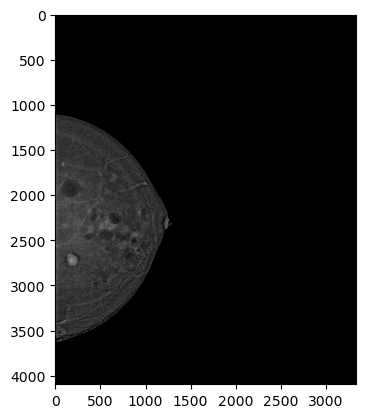

In [13]:
import matplotlib.pyplot as plt
plt.imshow(dataset[0][0])
# dataset[0][0][0].shape

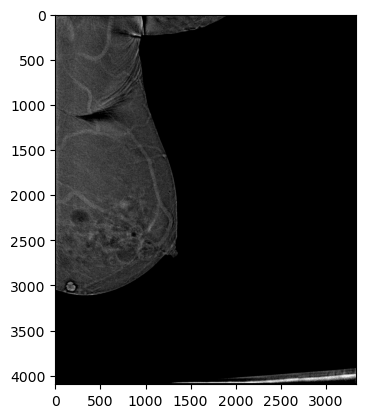

In [14]:
plt.imshow(dataset[0][1])

In [31]:
img = cv2.imread("/home/ic38884/Mammogram-1/substracted/AMMU41F_JEMSH_I_2023-01-11_LCC_1.2.840.113681.2886730125.1674117454.4832.373.tif")
img.shape

(3328, 2560, 3)

In [15]:
# dataset = np.array(dataset)
# path = '/home/ic38884/Mammogram-1/paired_views_data.npy'
# np.save(path, dataset)


import numpy as np
import pickle

# dataset = np.array(dataset)

# Define the path for the pickle file
pickle_path = '/home/ic38884/Mammogram-1/paired_views_data_np.pkl'

# Save dataset to the specified path as a pickle file
with open(pickle_path, 'wb') as file:
    pickle.dump(dataset, file)

In [18]:
np.array(dataset,dtype=object).shape

(361, 3)

In [ ]:
#previous code

#   if left==0:
#     try:
#       if len(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"])==1:                         #if no duplicate check for the label
#         label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"])
#         label_eight=df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["Right"].item()
#       else:                                                                                                       #if duplicate found take the first one
#         label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["rightlabel"].reset_index(drop=True)[0])
#         label_eight=str(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["Right"].reset_index(drop=True)[0])
#       # count+=1
#       # print(label_eight)
#       if label==0:
#         shutil.copy(main_path+file_name,normal_path)
#       elif label==1:
#         shutil.copy(main_path+file_name,benign_path)
#       else:
#         shutil.copy(main_path+file_name,malignant_path)
#       shutil.copy(main_path+file_name,dataset2_path+label_eight)
#     except:
#       print(patient_name, patient_age)
#   else:
#     try:
#       if len(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"])==1:
#         label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"])
#         label_eight=df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["Left"].item()
#       else:
#         label=int(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["leftlabel"].reset_index(drop=True)[0])
#         label_eight=str(df[(df["Name"]==patient_name) & (df['Age']==patient_age)]["Left"].reset_index(drop=True)[0])
#       # count+=1
#       # print(label_eight)
#       if label==0:
#         shutil.copy(main_path+file_name,normal_path)
#       elif label==1:
#         shutil.copy(main_path+file_name,benign_path)
#       else:
#         shutil.copy(main_path+file_name,malignant_path)
#       shutil.copy(main_path+file_name,dataset2_path+label_eight)
#     except:
#       print(patient_name, patient_age)
# # print(count)

In [ ]:
# 34 cases have missing data